In [1]:
import os
import numpy as np
import torch
from torch.utils.data import DataLoader
import torchvision
from torchvision.transforms import ToTensor, Normalize, Compose
from torch.optim import lr_scheduler

In [2]:
from scripts.mnistParity import MNISTParity
from scripts.architecture import MLP
from scripts.train_utils import accuracy
from scripts.train import train_epoch, train_model, test_model
from scripts.plot_utils import plot_loss_accuracy

In [3]:
print(torch.__version__)
print(np.__version__)

1.9.0
1.20.2


## Create Parity Data Iterator

### Vertical

In [4]:
transforms = Compose([
    ToTensor(),
    Normalize((0.1307,), (0.3081,))
])

In [5]:
trainset = torchvision.datasets.MNIST(root='data', train=True, download=True, transform=transforms)
testset = torchvision.datasets.MNIST(root='data', train=False, download=True, transform=transforms)

In [6]:
learn_rate = 0.05
num_epochs = 20
batch_size = 128
loss_fn = torch.nn.CrossEntropyLoss()

### For k = 1

In [8]:
# k = 1
k = 1
model = MLP(k)
optimizer = torch.optim.Adadelta(model.parameters(), lr=learn_rate, weight_decay = 0.001)

trainLostList, trainAccList, valLossList, valAccList  = train_model(model, k, trainset, testset, loss_fn, optimizer, num_epochs, batch_size, validate_model = True,
                                                                     performance=accuracy, device="cuda:0", lr_scheduler=None)


Training on cuda:0
Epoch 1 completed. Loss - total: 54198.3314 - average: 0.9033; Performance: 0.9079
TESTING - loss 3261.969397404464 - performance 0.9563
Epoch 2 completed. Loss - total: 15596.5706 - average: 0.2599; Performance: 0.9615
TESTING - loss 2314.3853467855697 - performance 0.9651
Epoch 3 completed. Loss - total: 9046.8254 - average: 0.1508; Performance: 0.9733
TESTING - loss 1490.6029567438454 - performance 0.9734
Epoch 4 completed. Loss - total: 5690.9864 - average: 0.0948; Performance: 0.9813
TESTING - loss 1429.0443587250338 - performance 0.9745
Epoch 5 completed. Loss - total: 3726.6674 - average: 0.0621; Performance: 0.9866
TESTING - loss 1314.700829956535 - performance 0.9775
Epoch 6 completed. Loss - total: 2487.0205 - average: 0.0415; Performance: 0.9898
TESTING - loss 1267.589094896568 - performance 0.9791
Epoch 7 completed. Loss - total: 1847.0010 - average: 0.0308; Performance: 0.9924
TESTING - loss 1178.0006378182588 - performance 0.9797
Epoch 8 completed. Loss

In [11]:
test_model(model, k, testset, 128, loss_fn = loss_fn)

TESTING - loss 1141.2386076016992 - performance 0.9817


(1141.2386076016992, 0.9817)

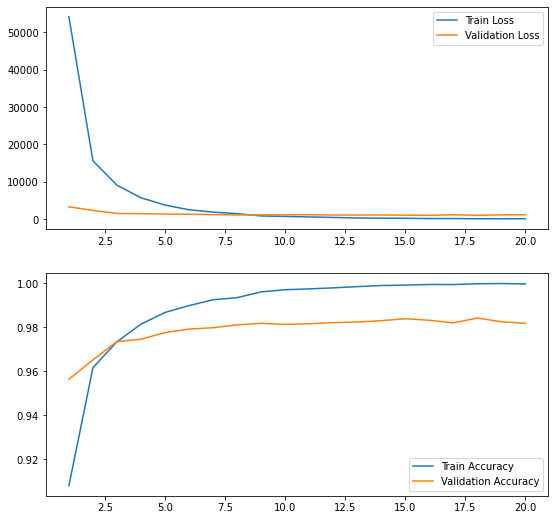

In [12]:
plot_loss_accuracy(trainLostList,valLossList,trainAccList,valAccList,num_epochs)

### For k = 3

In [14]:
k = 3
model3 = MLP(k)
optimizer = torch.optim.Adadelta(model3.parameters(), lr=learn_rate, weight_decay = 0.001)

trainLostList3, trainAccList3, valLossList3, valAccList3  = train_model(model3, k, trainset, testset, loss_fn, optimizer, num_epochs, batch_size, validate_model = True,
                                                                     performance=accuracy, device="cuda:0", lr_scheduler=None)


Training on cuda:0
Epoch 1 completed. Loss - total: 144116.0285 - average: 2.4019; Performance: 0.5076
TESTING - loss 6990.8815660476685 - performance 0.5165
Epoch 2 completed. Loss - total: 40936.8004 - average: 0.6823; Performance: 0.5463
TESTING - loss 6590.092995643616 - performance 0.5806
Epoch 3 completed. Loss - total: 38105.8557 - average: 0.6351; Performance: 0.6121
TESTING - loss 6049.84414100647 - performance 0.6501
Epoch 4 completed. Loss - total: 35868.7241 - average: 0.5978; Performance: 0.6551
TESTING - loss 5895.904763221741 - performance 0.6672
Epoch 5 completed. Loss - total: 34595.8053 - average: 0.5766; Performance: 0.6757
TESTING - loss 5691.431632041931 - performance 0.6797
Epoch 6 completed. Loss - total: 33620.8533 - average: 0.5603; Performance: 0.6917
TESTING - loss 5507.406733512878 - performance 0.6993
Epoch 7 completed. Loss - total: 33086.3309 - average: 0.5514; Performance: 0.6988
TESTING - loss 5442.8362493515015 - performance 0.7019
Epoch 8 completed. L

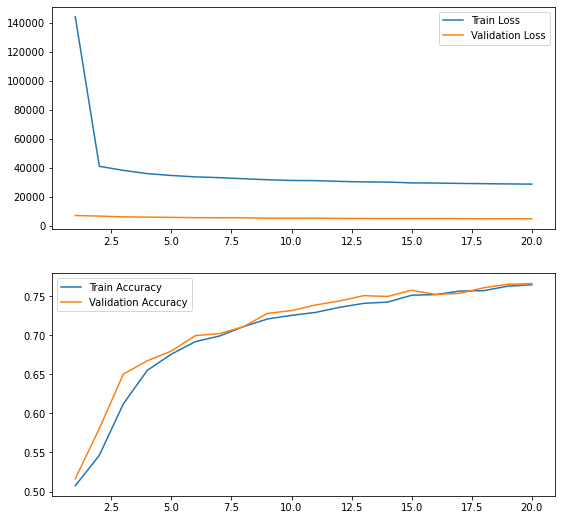

In [16]:
plot_loss_accuracy(trainLostList3,valLossList3,trainAccList3,valAccList3,num_epochs)